In [1]:
#Importing all the python's data science lybrary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Uploading the job_salary_dataset excel file in a variable called data

data = pd.read_excel('job_salary_dataset.xlsx')

In [3]:
# To see the first 5 rows of this dataset

data.head()

,Title,Ratings,location,Years of Experience,Salary
0,eCommerce Sales Account Coordinator,3.8,"Rickmansworth, England",2.0,£27K-£31K
1,Software Development Engineer - Stress Simulat...,4.5,"London, England",3.0,£43K-£66K
2,Technical Sales Specialist,4.1,"Bury St Edmunds, England",NaN,£27K-£44K
3,Associate,NaN,"Wakefield, England",1.0,£18K-£22K
4,DevOps/Platform Engineer - Manchester,4.2,"Manchester, England",3.0,£33K-£41K


In [4]:
# To see the last 5 rows of this dataset

data.tail()

,Title,Ratings,location,Years of Experience,Salary
2220,Financial Accountant/Finance Manager,4.2,Kettering\nNorthamptonshire,4.0,"£50,000 - £60,000 per annum"
2221,Platform Engineer - DevOps Terraform CI/CD,4.3,Leeds\nWest Yorkshire,5.0,"£65,000 - £80,000 per annum"
2222,Technical Digital Content Executive,3.9,Manchester\nLancashire,2.0,"£20,000 - £25,000 per annum"
2223,"Commercial Gas Engineer - London - £50,000 + V...",4.1,Southwark\nLondon,3.0,"£45,000 - £50,000 per annum"
2224,COMMERCIAL ACCOUNT EXECUTIVE - HERTS / NORTH L...,4.2,London\nLondon,4.0,"£35,000 - £70,000 per annum"


In [5]:
# Length of the dataset. The dataset has 2225 rows

len(data)

2225

In [6]:
# To see all the data counts of each columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                2183 non-null   object 
 1   Ratings              2127 non-null   float64
 2   location             2225 non-null   object 
 3   Years of Experience  2100 non-null   float64
 4   Salary               2225 non-null   object 
dtypes: float64(2), object(3)
memory usage: 87.0+ KB


## Feature Engineering

***

In [7]:
# Spliting the first city location from each location on the location column

arr = []
for i in range(904):
    k = data['location'][i].split(',')[0]
    arr.append(k)
    
for i in range(904,len(data)):
    j = data['location'][i].split('\n')[0]
    arr.append(j)

In [8]:
a = pd.DataFrame(data=arr, columns=["location_inside"])

In [9]:
data['location_inside'] = a

In [10]:
data.head()

,Title,Ratings,location,Years of Experience,Salary,location_inside
0,eCommerce Sales Account Coordinator,3.8,"Rickmansworth, England",2.0,£27K-£31K,Rickmansworth
1,Software Development Engineer - Stress Simulat...,4.5,"London, England",3.0,£43K-£66K,London
2,Technical Sales Specialist,4.1,"Bury St Edmunds, England",NaN,£27K-£44K,Bury St Edmunds
3,Associate,NaN,"Wakefield, England",1.0,£18K-£22K,Wakefield
4,DevOps/Platform Engineer - Manchester,4.2,"Manchester, England",3.0,£33K-£41K,Manchester


In [11]:
# Calculating the average value of each salary

arrr = []
for i in range(904):
    t = (int(data['Salary'][i].split('-')[0].split('K')[0][1:]) + int(data['Salary'][i].split('-')[1].split('K')[0][1:]))/2
    arrr.append(t)
    
for i in range(904, len(data)):
    s = (int(data['Salary'][i].split()[0].split(',')[0][1:]) + int(data['Salary'][i].split()[2].split(',')[0][1:]))/2
    arrr.append(s)

In [12]:
b = pd.DataFrame(data=arrr, columns=["salary_avg"])

In [13]:
data['salary_avg'] = b

In [14]:
data.head()

,Title,Ratings,location,Years of Experience,Salary,location_inside,salary_avg
0,eCommerce Sales Account Coordinator,3.8,"Rickmansworth, England",2.0,£27K-£31K,Rickmansworth,29.0
1,Software Development Engineer - Stress Simulat...,4.5,"London, England",3.0,£43K-£66K,London,54.5
2,Technical Sales Specialist,4.1,"Bury St Edmunds, England",NaN,£27K-£44K,Bury St Edmunds,35.5
3,Associate,NaN,"Wakefield, England",1.0,£18K-£22K,Wakefield,20.0
4,DevOps/Platform Engineer - Manchester,4.2,"Manchester, England",3.0,£33K-£41K,Manchester,37.0


In [15]:
# To see the number of job posts in the cities

data['location_inside'].value_counts().head(20)

London           665
Manchester        65
Edinburgh         48
Bristol           40
Leeds             39
Glasgow           29
Reading           25
Birmingham        23
Nottingham        23
Oxford            22
Liverpool         20
Milton Keynes     19
Dundee            18
Cambridge         16
Sheffield         16
Bath              14
Derby             14
High Wycombe      14
Peterborough      12
Aberdeen          12
Name: location_inside, dtype: int64

In [16]:
# location_inside is a text categorical features. So, it should be transformed
# into numeric category
# An ordinal order is used for each location using python's map function

data['location_inside'].value_counts().to_dict()
data_frequency_map1 = data['location_inside'].value_counts().to_dict()
data['location_ordinal'] = data['location_inside'].map(data_frequency_map1)

In [17]:
data.head()

,Title,Ratings,location,Years of Experience,Salary,location_inside,salary_avg,location_ordinal
0,eCommerce Sales Account Coordinator,3.8,"Rickmansworth, England",2.0,£27K-£31K,Rickmansworth,29.0,1
1,Software Development Engineer - Stress Simulat...,4.5,"London, England",3.0,£43K-£66K,London,54.5,665
2,Technical Sales Specialist,4.1,"Bury St Edmunds, England",NaN,£27K-£44K,Bury St Edmunds,35.5,2
3,Associate,NaN,"Wakefield, England",1.0,£18K-£22K,Wakefield,20.0,6
4,DevOps/Platform Engineer - Manchester,4.2,"Manchester, England",3.0,£33K-£41K,Manchester,37.0,65


In [18]:
# Droping the 'Title', 'location', 'Salary', 'location_inside' columns. Because these have text
# categorical features

data.drop(['Title', 'location', 'Salary', 'location_inside'], axis=1, inplace=True)

In [19]:
data.head(10)

,Ratings,Years of Experience,salary_avg,location_ordinal
0,3.8,2.0,29.0,1
1,4.5,3.0,54.5,665
2,4.1,NaN,35.5,2
3,NaN,1.0,20.0,6
4,4.2,3.0,37.0,65
5,4.4,3.0,35.0,65
6,3.8,2.0,48.5,665
7,4.2,3.0,80.0,665
8,NaN,5.0,45.0,2
9,3.4,3.0,19.0,4


In [20]:
# Counts of the null values of features

data.isnull().sum()

Ratings                 98
Years of Experience    125
salary_avg               0
location_ordinal         0
dtype: int64

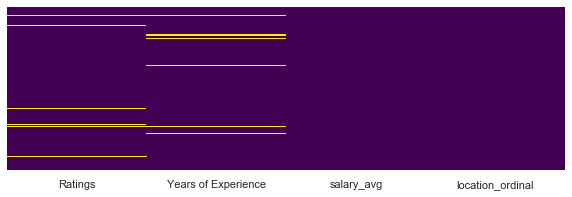

In [21]:
# A better way to see the null values with seaborn's visualization plot function

sns.set(rc={'figure.figsize':(10,3)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
# removing all the null values

data.dropna(inplace=True)

In [23]:
#Checking the null values again

data.isnull().sum()

Ratings                0
Years of Experience    0
salary_avg             0
location_ordinal       0
dtype: int64

***

## Data Analysis

***

In [24]:
# To see a brief overview of the statistical method or operation of the dataset

data.describe()

,Ratings,Years of Experience,salary_avg,location_ordinal
count,2018.000000,2018.000000,2018.000000,2018.000000
mean,4.022200,2.836472,39.254212,205.657582
std,0.263124,1.157853,18.697082,298.107834
min,3.100000,1.000000,11.000000,1.000000
25%,3.900000,2.000000,25.000000,4.000000
50%,4.000000,3.000000,35.000000,12.000000
75%,4.200000,3.000000,47.500000,665.000000
max,5.000000,7.000000,128.000000,665.000000


In [25]:
# Minimum of the Ratings, Years of Experience, salary_avg  and location_ordinal columns

data.min()

Ratings                 3.1
Years of Experience     1.0
salary_avg             11.0
location_ordinal        1.0
dtype: float64

In [26]:
# Maximum of the Ratings, Years of Experience, salary_avg  and location_ordinal columns

data.max()

Ratings                  5.0
Years of Experience      7.0
salary_avg             128.0
location_ordinal       665.0
dtype: float64

In [27]:
# Mean of the salary_avg column

data['salary_avg'].mean()

39.25421209117938

In [28]:
# Standard deviation of the salary_avg column

data['salary_avg'].std()

18.697081518554295

In [29]:
# Pearson's correlation of the Ratings, Years of Experience, salary_avg 
# and location_ordinal features

data.corr()

,Ratings,Years of Experience,salary_avg,location_ordinal
Ratings,1.000000,0.706474,0.764301,0.187206
Years of Experience,0.706474,1.000000,0.880063,0.193126
salary_avg,0.764301,0.880063,1.000000,0.240047
location_ordinal,0.187206,0.193126,0.240047,1.000000


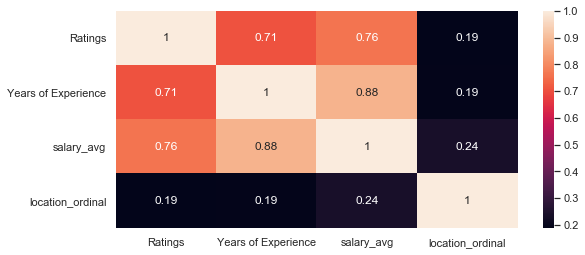

In [30]:
# A better visualization of the Pearson's correlation with heatmap()

sns.set(rc={'figure.figsize':(9,4)})
sns.heatmap(data.corr(), annot = True)

In [31]:
# The Ratings and the Years of Experience features have a good correlation
# with the salary_avg feature column.

***

### Data Visualization

***

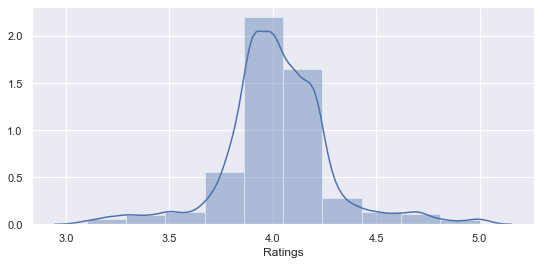

In [32]:
# A Histogram plot of Ratings column

sns.distplot(data['Ratings'], bins=10)

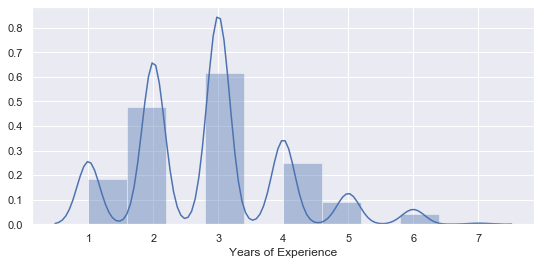

In [33]:
# A Histogram plot of Years of Experience column

sns.distplot(data['Years of Experience'], bins=10)

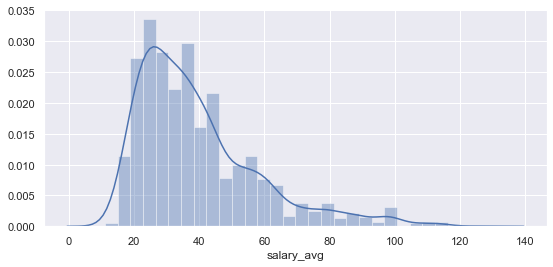

In [34]:
# A Histogram plot of salary_avg column

sns.distplot(data['salary_avg'], bins=30)

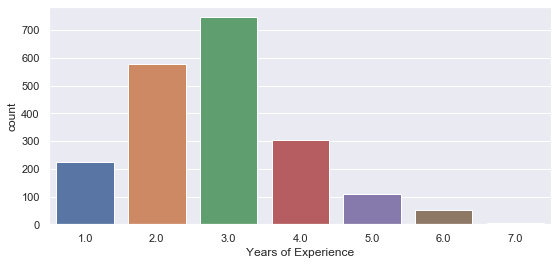

In [35]:
# Count plot of Years of Experience feature

sns.countplot(data['Years of Experience'])

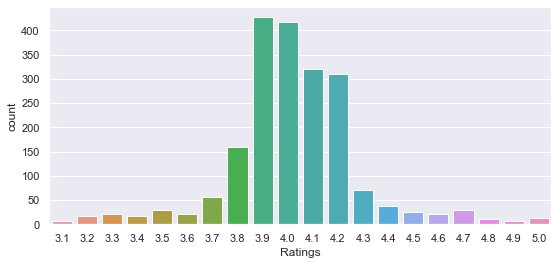

In [36]:
# Count plot of Ratings feature

sns.countplot(data['Ratings'])

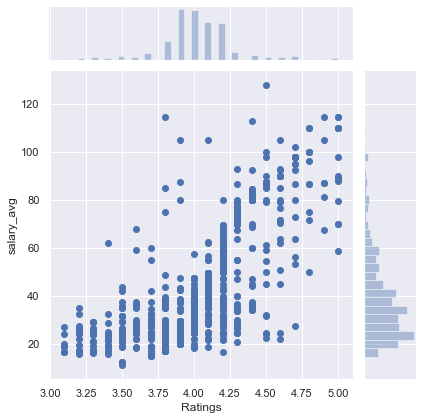

In [37]:
# A Scatter plot of Ratings vs salary_avg

sns.jointplot(data['Ratings'], data['salary_avg'], data= data)

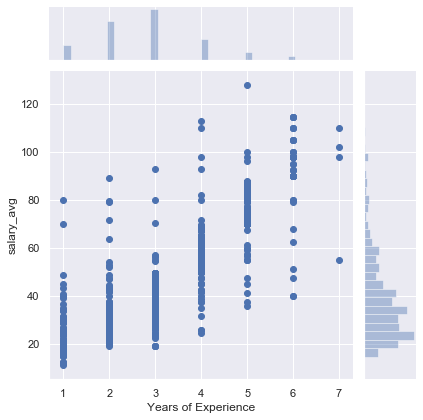

In [38]:
# A Scatter plot of Years of Experience vs salary_avg

sns.jointplot(x='Years of Experience', y='salary_avg', data= data)

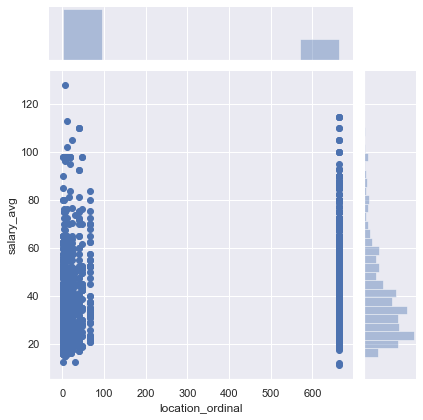

In [39]:
# A Scatter plot of location_ordinal vs salary_avg

sns.jointplot(x='location_ordinal', y='salary_avg', data= data)

***

## Machine Learning Algorithms

***

In [40]:
# As the dataset has regression type features and the salary
# is the correlated to Ratings and Years of Experience features
# So, regression type algorithms have been used.

In [41]:
# Here, X is a variable where Ratings and Years of Experience have been stored
# as a predictive feature. It is a two dimentional array
# y is a variable where the salary_avg column has been stored
# as a label feature

X = data[['Ratings', 'Years of Experience']]
y = data['salary_avg']

In [42]:
# sklearn is a scientific library for machine learning algorithms in python
# Here sklearn has a module called model_selection where train_test_split
# is a funtion to split the dataset into train and test portion.
# Train dataset has 67% of the data where test dataset has 33% data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
###

### Linear Regression

In [44]:
# Importing the Linear Regression algorithms from sklearn's linear_model module

from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lg.score(X_test, y_test)

0.8360556053154703

In [46]:
# Linear Regression model has 83.61% accuracy over test dataset

In [47]:
###

### Decision Tree Regressor

In [48]:
# Importing the Decision Tree Regressor algorithms from sklearn's tree module

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
dtree.score(X_test, y_test)

0.8815478751882665

In [50]:
# Decision Tree Regressor model has 88.15% accuracy over test dataset

In [51]:
###

### Random Forest Regressor

In [52]:
# Importing the Random Forest Regressor algorithms from sklearn's tree module

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
rf.score(X_test, y_test)

0.8943001256648041

In [54]:
# Random Forest Regressor model has 89.22% accuracy over test dataset

***